<a href="https://colab.research.google.com/github/VayuSarangam/quant-finance-portfolio/blob/main/monte-carlo/Monte_Carlo_GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Simulation of Stock Prices (GBM)

This project simulates stock price paths using Geometric Brownian Motion (GBM).

Model:
dS = μS dt + σS dW

Discretization:
S(t+dt) = S(t) * exp[(μ - 0.5σ²)dt + σ√dt * Z]

What this notebook does:
- Simulates multiple price paths
- Visualizes simulated trajectories
- Shows distribution of terminal prices
- Estimates expected return and volatility
- (Extension) Monte Carlo pricing of a European call option


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Parameters
S0 = 100        # Initial stock price
mu = 0.08       # Expected return
sigma = 0.20    # Volatility
T = 1           # Time horizon (years)
steps = 252     # Trading days
paths = 5000    # Number of simulations
dt = T / steps

np.random.seed(42)


Monte Carlo Simulation

In [5]:
# Generate random shocks
Z = np.random.standard_normal((steps, paths))

# GBM formula
increments = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z

log_paths = np.zeros((steps + 1, paths))
log_paths[0] = np.log(S0)
log_paths[1:] = log_paths[0] + np.cumsum(increments, axis=0)

price_paths = np.exp(log_paths)


Plot Price Paths

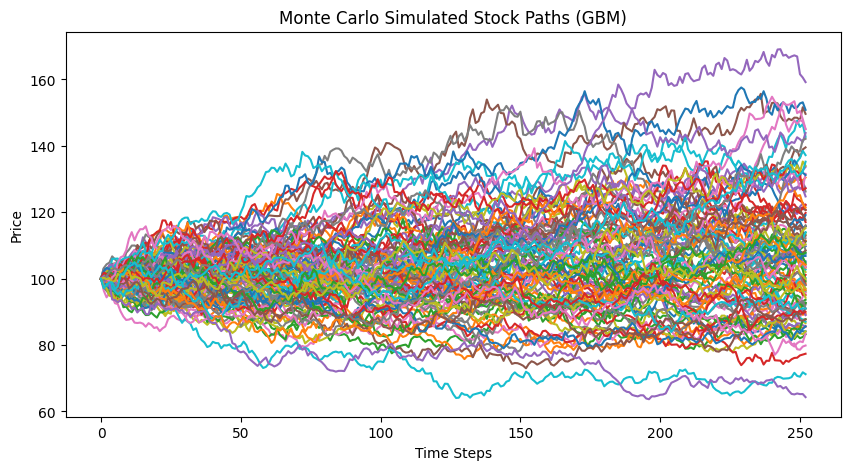

In [6]:
plt.figure(figsize=(10,5))
plt.plot(price_paths[:, :100])
plt.title("Monte Carlo Simulated Stock Paths (GBM)")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.show()


Terminal Price Distribution

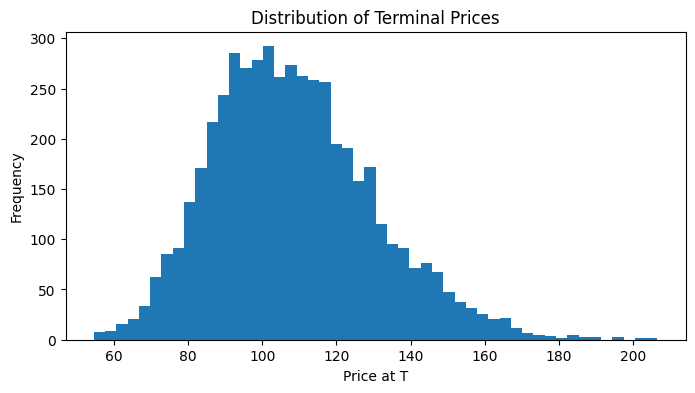

In [7]:
terminal_prices = price_paths[-1]

plt.figure(figsize=(8,4))
plt.hist(terminal_prices, bins=50)
plt.title("Distribution of Terminal Prices")
plt.xlabel("Price at T")
plt.ylabel("Frequency")
plt.show()


Summary Statistics

In [9]:
log_returns = np.log(terminal_prices / S0)

print("Expected return:", np.mean(log_returns))
print("Volatility:", np.std(log_returns))


Expected return: 0.061615335838760686
Volatility: 0.20020786199204935


(Important for Quant Signal) Option Pricing

In [10]:
# European Call Pricing using Monte Carlo

K = 100      # Strike
r = 0.05     # Risk-free rate

# Risk-neutral pricing
Z = np.random.standard_normal((steps, paths))
increments = (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z

log_paths = np.zeros((steps + 1, paths))
log_paths[0] = np.log(S0)
log_paths[1:] = log_paths[0] + np.cumsum(increments, axis=0)

S_T = np.exp(log_paths[-1])

payoff = np.maximum(S_T - K, 0)
call_price = np.exp(-r * T) * np.mean(payoff)

print("Monte Carlo Call Price:", call_price)


Monte Carlo Call Price: 10.31672790806665
